## Simulate using SEIRD epidemiological model

The first step to begin the simulation is to determine the differential equations reggarding the model. The SEIRD model divides the population into 5 groups, those suseptible to the disease $S(t)$, those who got the disease, but didn't develop symptoms yet $E(t)$, the ones who are infected and already show symptoms $I(t)$, those who recovered from the disease $R(t)$ and acquried immunicity and at last, the ones who sadly died from the disease $D(t)$.

The behavior of these populations is governed by exchanging rates, that is, rates in which individuals leave a group and get to another group.

![models.png](models.png)

With that in hands, we build the equations for the $S$ population

$$\frac{dS}{dt} = -\beta  \frac{S(t)I(t)}{N}$$

the $E$ population

$$\frac{dE}{dt} = \beta  \frac{S(t)I(t)}{N} - \alpha E(t)$$

the $I$ population

$$\frac{dI}{dt} = \alpha E(t) - \gamma I(t) - \delta I(t)$$

the $R$ population

$$\frac{dR}{dt} = \gamma I(t)$$

and the $D$ population

$$\frac{dD}{dt} = \delta I(t)$$

In [106]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
# Population of bangladesh
N = 160000000

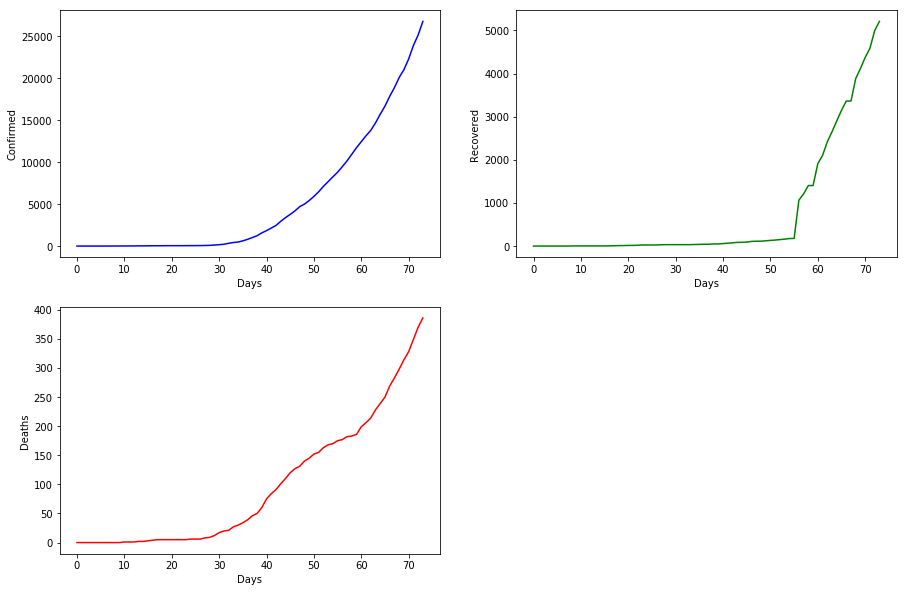

[['3/8/2020' 3 0 0]
 ['3/9/2020' 3 0 0]
 ['3/10/2020' 3 0 0]
 ['3/11/2020' 3 0 0]
 ['3/12/2020' 3 0 0]
 ['3/13/2020' 3 0 0]
 ['3/14/2020' 3 0 0]
 ['3/15/2020' 5 0 0]
 ['3/16/2020' 8 2 0]
 ['3/17/2020' 10 3 0]
 ['3/18/2020' 14 3 1]
 ['3/19/2020' 17 3 1]
 ['3/20/2020' 20 3 1]
 ['3/21/2020' 25 3 2]
 ['3/22/2020' 27 3 2]
 ['3/23/2020' 33 3 3]
 ['3/24/2020' 39 5 4]
 ['3/25/2020' 39 7 5]
 ['3/26/2020' 44 11 5]
 ['3/27/2020' 48 11 5]
 ['3/28/2020' 48 15 5]
 ['3/29/2020' 48 15 5]
 ['3/30/2020' 49 19 5]
 ['3/31/2020' 51 25 5]
 ['4/1/2020' 54 25 6]
 ['4/2/2020' 56 25 6]
 ['4/3/2020' 61 26 6]
 ['4/4/2020' 70 30 8]
 ['4/5/2020' 88 33 9]
 ['4/6/2020' 123 33 12]
 ['4/7/2020' 164 33 17]
 ['4/8/2020' 218 33 20]
 ['4/9/2020' 330 33 21]
 ['4/10/2020' 424 33 27]
 ['4/11/2020' 482 36 30]
 ['4/12/2020' 621 39 34]
 ['4/13/2020' 803 42 39]
 ['4/14/2020' 1012 42 46]
 ['4/15/2020' 1231 49 50]
 ['4/16/2020' 1572 49 60]
 ['4/17/2020' 1838 58 75]
 ['4/18/2020' 2144 66 84]
 ['4/19/2020' 2456 75 91]
 ['4/20/2020' 2

In [108]:
#data feeding
df = pd.read_csv("covid_19_bd.csv", header = 0) # dataset
df = np.array(df)

fig = plt.figure(1, figsize=(15, 10))
chart1 = fig.add_subplot(221)
chart1.plot(df[:,1], 'b')
plt.xlabel("Days")
plt.ylabel("Confirmed")
chart2 = fig.add_subplot(222)
chart2.plot(df[:,2], 'g')
plt.xlabel("Days")
plt.ylabel("Recovered")
chart3 = fig.add_subplot(223)
chart3.plot(df[:,3], 'r')
plt.xlabel("Days")
plt.ylabel("Deaths")
plt.savefig("/Users/amimu/Desktop/plot1.png", bbox_inches = "tight")
plt.show()


print (df)

In [109]:
available = len(df[:, -1])    #df,index  here index is the first column
print("Available", available, "days")


Available 74 days


In [110]:
start_date = df[0, 0]

confirmed = df[:, 1]
recovered = df[:, 2]
deaths =  df[:, 3]
infected = [ c - r - d for (c, r, d) in zip(confirmed, recovered, deaths)]  #excellent use of zip


In [111]:
print(start_date)

3/8/2020


In [112]:
#Helper Function

t_max = available + 7

date = np.array('2020-03-08', dtype=np.datetime64)  #dtype used to define date type
print(date)
dates = date + np.arange(t_max)     #we include t_max number of dates in dates variable
print(dates)
str_dates = [] #created a list to store those dates as a string
for i in dates:
    str_dates.append(str(i))

print(str_dates)
print(len(str_dates))

2020-03-08
['2020-03-08' '2020-03-09' '2020-03-10' '2020-03-11' '2020-03-12'
 '2020-03-13' '2020-03-14' '2020-03-15' '2020-03-16' '2020-03-17'
 '2020-03-18' '2020-03-19' '2020-03-20' '2020-03-21' '2020-03-22'
 '2020-03-23' '2020-03-24' '2020-03-25' '2020-03-26' '2020-03-27'
 '2020-03-28' '2020-03-29' '2020-03-30' '2020-03-31' '2020-04-01'
 '2020-04-02' '2020-04-03' '2020-04-04' '2020-04-05' '2020-04-06'
 '2020-04-07' '2020-04-08' '2020-04-09' '2020-04-10' '2020-04-11'
 '2020-04-12' '2020-04-13' '2020-04-14' '2020-04-15' '2020-04-16'
 '2020-04-17' '2020-04-18' '2020-04-19' '2020-04-20' '2020-04-21'
 '2020-04-22' '2020-04-23' '2020-04-24' '2020-04-25' '2020-04-26'
 '2020-04-27' '2020-04-28' '2020-04-29' '2020-04-30' '2020-05-01'
 '2020-05-02' '2020-05-03' '2020-05-04' '2020-05-05' '2020-05-06'
 '2020-05-07' '2020-05-08' '2020-05-09' '2020-05-10' '2020-05-11'
 '2020-05-12' '2020-05-13' '2020-05-14' '2020-05-15' '2020-05-16'
 '2020-05-17' '2020-05-18' '2020-05-19' '2020-05-20' '2020-05-21'

In [133]:
def seird_model(init_vals, params, t):

    DATE_0, S_0, E_0, I_0, R_0, D_0 = init_vals
    DATE, S, E, I, R, D = [DATE_0], [S_0], [E_0], [I_0], [R_0], [D_0]
    alpha, beta, gamma, delta = params
    
    ##### Create next t days ######
    date = np.array(DATE, dtype=np.datetime64)   #date is a array type, Begingin from an specific date
    dates = date + np.arange(len(t))
    str_dates = []
    for i in dates:
        str_dates.append(str(i))       #Creating a list of t numbers of sequential date
        
    ##### End creating t days #####
    for tic in t[1:]:             #t[1:] is used to start from 2nd date because the value of first date is given
  
        DATE.append(str_dates[tic])

        next_S = S[-1] - (0.2 *beta * (S[-1] / N) * I[-1] )  # Susceptible
        next_E = E[-1] + (beta * (S[-1] / N) * I[-1] ) - ( alpha * E[-1] ) # Exposed
        next_I = I[-1] + ( alpha * E[-1] ) - ( gamma * I[-1] ) - ( delta * I[-1] ) # Infected
        next_R = R[-1] + ( gamma * I[-1] ) # Recovered
        next_D = D[-1] + ( delta * I[-1] ) # Deaths
        
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        D.append(next_D)


    return np.stack([DATE, S, E, I, R, D]).T

In [134]:
# Spliting the data for one day rolling window approach

train_min = 1
train_max = available 

inf_train = []   #making 2d array of each row consist of 2 days data, the cases with the previous one and the next one
rec_train = []
death_train = []

for i in range(train_min, train_max):     #why I didn't find the difference here?
#    j = i - 2
#     inf_train.append(infected[j:i])
#     rec_train.append(recovered[j:i])
#     death_train.append(deaths[j:i])
    inf_train.append(infected[i-1:i+1])
    rec_train.append(recovered[i-1:i+1])
    death_train.append(deaths[i-1:i+1])

In [135]:
t2 = np.arange(0, 3, 1)
print(t2)
print(len(inf_train))
for sample in range(len(inf_train)):
    print(sample)
    print(str_dates[sample])

[0 1 2]
73
0
2020-03-08
1
2020-03-09
2
2020-03-10
3
2020-03-11
4
2020-03-12
5
2020-03-13
6
2020-03-14
7
2020-03-15
8
2020-03-16
9
2020-03-17
10
2020-03-18
11
2020-03-19
12
2020-03-20
13
2020-03-21
14
2020-03-22
15
2020-03-23
16
2020-03-24
17
2020-03-25
18
2020-03-26
19
2020-03-27
20
2020-03-28
21
2020-03-29
22
2020-03-30
23
2020-03-31
24
2020-04-01
25
2020-04-02
26
2020-04-03
27
2020-04-04
28
2020-04-05
29
2020-04-06
30
2020-04-07
31
2020-04-08
32
2020-04-09
33
2020-04-10
34
2020-04-11
35
2020-04-12
36
2020-04-13
37
2020-04-14
38
2020-04-15
39
2020-04-16
40
2020-04-17
41
2020-04-18
42
2020-04-19
43
2020-04-20
44
2020-04-21
45
2020-04-22
46
2020-04-23
47
2020-04-24
48
2020-04-25
49
2020-04-26
50
2020-04-27
51
2020-04-28
52
2020-04-29
53
2020-04-30
54
2020-05-01
55
2020-05-02
56
2020-05-03
57
2020-05-04
58
2020-05-05
59
2020-05-06
60
2020-05-07
61
2020-05-08
62
2020-05-09
63
2020-05-10
64
2020-05-11
65
2020-05-12
66
2020-05-13
67
2020-05-14
68
2020-05-15
69
2020-05-16
70
2020-05-17
71
20

In [136]:
last5_vals = []
last5_params = []

t_incub = 10  # Assumption 5 days

for sample in range(len(inf_train)):

    i_0 = inf_train[sample][0]
    i_1 = inf_train[sample][1]
    i_diff = i_1 - i_0


    r_0 = rec_train[sample][0]
    r_1 = rec_train[sample][1]
    r_diff = r_1 - r_0


    d_0 = death_train[sample][0]
    d_1 = death_train[sample][1]
    d_diff = d_1 - d_0


    if (sample == 0):

        e_0 = confirmed[t_incub] - confirmed[sample]     #found initial exposed as the next 10 days confirmed people 
        e_1 = confirmed[t_incub + 1] - confirmed[sample + 1]
        e_diff = e_1 - e_0
        
        s_0 = N - e_0 - i_0- r_0 - d_0


    alpha = ( i_diff + r_diff + d_diff) / e_0  # alpha
    beta = ( ( ( e_diff + i_diff + r_diff + d_diff) * N ) / ( s_0 * i_0 ) ) # beta
    gamma = r_diff / i_0  # gamma
    delta = d_diff / i_0  # delta

    init_vals = str_dates[sample], s_0, e_0, i_0, r_0, d_0
    params = alpha, beta, gamma, delta
    pred = seird_model(init_vals, params, t2)
    
    # Date: 0, S:1, E:2, I:3, R:4, D:5
    s_0 = float(pred[1][1])
    
    e_0 = float(pred[1][2])
    e_1 = float(pred[2][2])
    e_diff = e_1 - e_0

    # Store Last five cases for predecting future
    if ((len( inf_train )  - sample ) <= 5):
        print(str_dates[sample])
        last5_vals.append(init_vals)
        last5_params.append(params)

2020-05-15
2020-05-16
2020-05-17
2020-05-18
2020-05-19


In [137]:
for v in last5_vals: 
    print(v)

('2020-05-15', 159917235.95049608, 393699.2475198846, 15885, 3882, 298)
('2020-05-16', 159911418.0859856, 421858.5700723396, 16564, 4117, 314)
('2020-05-17', 159905296.46278688, 451193.686065947, 17567, 4373, 328)
('2020-05-18', 159898756.30975622, 482292.45121933025, 18936, 4585, 349)
('2020-05-19', 159891799.0533059, 515827.733470902, 19758, 4993, 370)


In [138]:
for p in last5_params: 
    print(p)

(0.0023622092393078002, 1.832192478964171, 0.014793830657853321, 0.0010072395341517155)
(0.003017599001915993, 1.8488934535731867, 0.015455204056991065, 0.0008452064718666989)
(0.003550581600483323, 1.862590772752084, 0.012068082199578755, 0.0011954232367507257)
(0.0025938618712302583, 1.8382080698819998, 0.021546261089987327, 0.001108998732572877)
(0.0031347674719223203, 1.8523392027221182, 0.010831055774876, 0.0008097985626075514)


Based on each learned parameter, we will predict values from 10 April to 16 April

In [141]:
# How many days should we use ?? and Why ?? 
t7 = np.arange(0, 500, 1)
#print(t7)

Predictions using 2020-05-15 parameters

-----------------------------------------------------
Date 		Infected 	Recovered 	Deaths
-----------------------------------------------------
2020-05-21 	 20836 		 5459 		 405
2020-05-22 	 21883 		 5767 		 426
2020-05-23 	 22999 		 6091 		 448
2020-05-24 	 24190 		 6431 		 471
2020-05-25 	 25457 		 6789 		 495
2020-05-26 	 26805 		 7166 		 521
2020-05-27 	 28237 		 7562 		 548
2020-05-28 	 29758 		 7980 		 577
2020-05-29 	 31373 		 8420 		 607
2020-05-30 	 33086 		 8885 		 638
2020-05-31 	 34903 		 9374 		 671
2020-06-01 	 36828 		 9890 		 707
2020-06-02 	 38867 		 10435 		 744
2020-06-03 	 41028 		 11010 		 783
2020-06-04 	 43315 		 11617 		 824
2020-06-05 	 45737 		 12258 		 868
2020-06-06 	 48301 		 12935 		 914
2020-06-07 	 51014 		 13649 		 963
2020-06-08 	 53884 		 14404 		 1014
2020-06-09 	 56921 		 15201 		 1068
2020-06-10 	 60133 		 16043 		 1126
2020-06-11 	 63530 		 16933 		 1186
2020-06-12 	 67124 		 17873 		 1250
2020-06-13 	 70923

2021-03-25 	 82885137 		 188206340 		 12814082
2021-03-26 	 82794586 		 189432528 		 12897567
2021-03-27 	 82702586 		 190657377 		 12980961
2021-03-28 	 82609167 		 191880865 		 13064262
2021-03-29 	 82514357 		 193102971 		 13147470
2021-03-30 	 82418186 		 194323675 		 13230581
2021-03-31 	 82320683 		 195542956 		 13313596
2021-04-01 	 82221873 		 196760794 		 13396513
2021-04-02 	 82121786 		 197977170 		 13479330
2021-04-03 	 82020448 		 199192066 		 13562046
2021-04-04 	 81917885 		 200405463 		 13644660
2021-04-05 	 81814124 		 201617342 		 13727171
2021-04-06 	 81709189 		 202827686 		 13809578
2021-04-07 	 81603107 		 204036478 		 13891879
2021-04-08 	 81495902 		 205243701 		 13974072
2021-04-09 	 81387598 		 206449337 		 14056158
2021-04-10 	 81278220 		 207653372 		 14138135
2021-04-11 	 81167790 		 208855788 		 14220002
2021-04-12 	 81056332 		 210056570 		 14301757
2021-04-13 	 80943869 		 211255704 		 14383400
2021-04-14 	 80830424 		 212453174 		 14464930
2021-04-15 	 

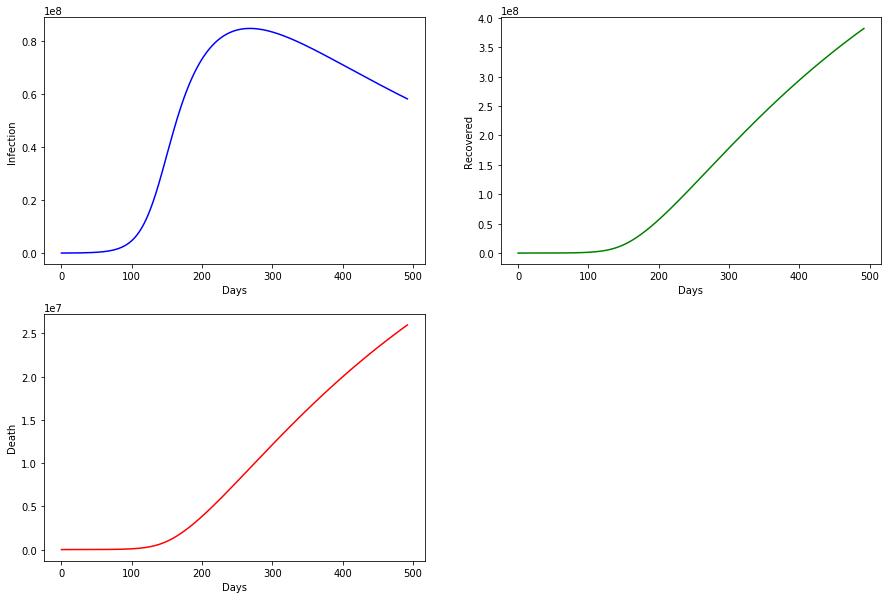

In [142]:
for z in range(1, len(last5_params)+1):
    chart_recovered = []
    chart_infected = []
    chart_death = []
    results = seird_model(last5_vals[z-1], last5_params[z-1], t7)
    t_z = np.arange(7 - z, 500 - z, 1)
    print("Predictions using", last5_vals[z-1][0], "parameters\n")
    print("-----------------------------------------------------")
    print("Date", "\t\tInfected", "\tRecovered", "\tDeaths")
    print("-----------------------------------------------------")
    for day in t_z:
        print(results[day][0], "\t", int(float(results[day][3])), "\t\t", int(float(results[day][4])), "\t\t", int(float(results[day][5])) )
        chart_infected.append( int(float(results[day][3])))
        chart_recovered.append( int(float(results[day][4])))
        chart_death.append( int(float(results[day][5])))
        
    print("----------------------------------------------------\n\n")
    fig = plt.figure(1, figsize=(15, 10))
    chart1 = fig.add_subplot(221)
    chart1.plot(chart_infected, 'b')
    plt.xlabel("Days")
    plt.ylabel("Infection")
    
    chart2 = fig.add_subplot(222)
    chart2.plot(chart_recovered, 'g')
    plt.xlabel("Days")
    plt.ylabel("Recovered")
    
    chart3 = fig.add_subplot(223)
    chart3.plot(chart_death, 'r')
    plt.xlabel("Days")
    plt.ylabel("Death")
    plt.savefig("/Users/amimu/Desktop/plot.png", bbox_inches = "tight")
    break
    plt.show()